In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection as train_test_split

In [7]:
df = pd.read_csv("loan_approval_data.csv")
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

In [12]:
df.isnull().sum()

Applicant_ID          50
Applicant_Income      50
Coapplicant_Income    50
Employment_Status     50
Age                   50
Marital_Status        50
Dependents            50
Credit_Score          50
Existing_Loans        50
DTI_Ratio             50
Savings               50
Collateral_Value      50
Loan_Amount           50
Loan_Term             50
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64

In [13]:
df.describe()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,501.220000,10852.571579,5082.455789,39.971579,1.474737,676.033684,1.950526,0.347263,9940.452632,24802.792632,20522.825263,48.000000
std,289.608451,5061.632859,2943.161570,11.139797,1.105067,71.346015,1.406246,0.144341,5860.736885,14345.696031,11504.142575,24.245322
min,1.000000,2009.000000,1.000000,21.000000,0.000000,550.000000,0.000000,0.100000,65.000000,36.000000,1015.000000,12.000000
25%,250.250000,6730.750000,2472.750000,30.250000,1.000000,616.250000,1.000000,0.220000,4760.250000,12698.250000,9806.250000,24.000000
50%,499.500000,10548.000000,5205.500000,40.000000,1.000000,678.000000,2.000000,0.340000,9880.500000,24321.000000,21210.500000,48.000000
75%,752.750000,15190.000000,7620.750000,49.000000,2.000000,737.000000,3.000000,0.480000,15074.500000,36947.000000,30263.000000,72.000000
max,1000.000000,19988.000000,9996.000000,59.000000,3.000000,799.000000,4.000000,0.600000,19996.000000,49954.000000,39995.000000,84.000000


## Handle missing values

In [15]:
# Here to handle empty values we have separated categorical and numerical dt
categorical_cols = df.select_dtypes(include=["object"]).columns
categorical_cols

Index(['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',
       'Education_Level', 'Gender', 'Employer_Category', 'Loan_Approved'],
      dtype='object')

In [16]:
numerical_cols = df.select_dtypes(include=["float64"]).columns
numerical_cols

Index(['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income', 'Age',
       'Dependents', 'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term'],
      dtype='object')

In [18]:
# This is the lib used to fill empty values 
from sklearn.impute import SimpleImputer

num_imp = SimpleImputer(strategy="mean")
df[numerical_cols] = num_imp.fit_transform(df[numerical_cols])
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [20]:
cat_imp = SimpleImputer(strategy="most_frequent")
df[categorical_cols] = cat_imp.fit_transform(df[categorical_cols])
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


In [21]:
df.isnull().sum()

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

## EDA

Text(0.5, 1.0, 'Is Loan Approved Or Not?')

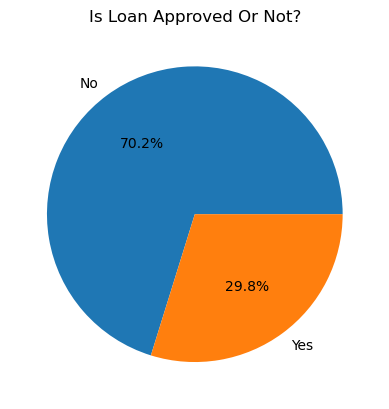

In [27]:
# Checking how balanced our output values are
output_count = df["Loan_Approved"].value_counts()

plt.pie(output_count, labels=["No", "Yes"], autopct="%1.1f%%")
plt.title("Is Loan Approved Or Not?")

[Text(0, 0, '621'), Text(0, 0, '379')]

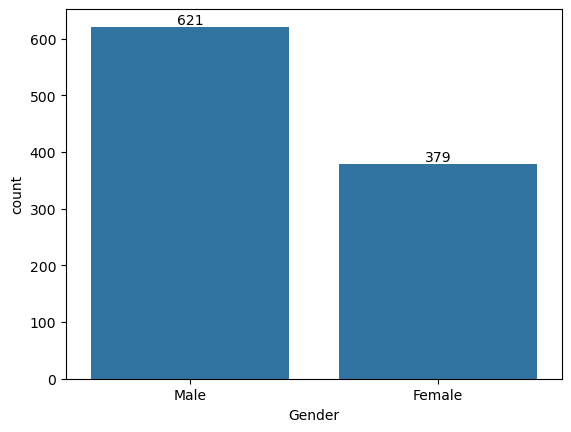

In [41]:
# features analyzation
gender = df["Gender"].value_counts()
ax = sns.barplot(gender)
ax.bar_label(ax.containers[0])  # Here we are using [0] because we have only 1 bar group ie gender

[Text(0, 0, '722'), Text(0, 0, '278')]

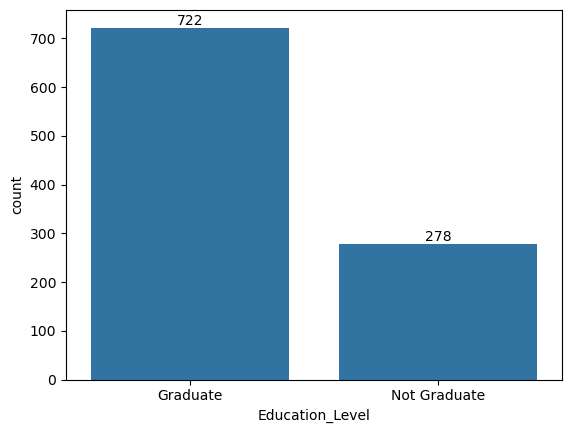

In [40]:
education_count = df["Education_Level"].value_counts()
ax = sns.barplot(education_count)
ax.bar_label(ax.containers[0])   

<Axes: xlabel='Applicant_Income', ylabel='Count'>

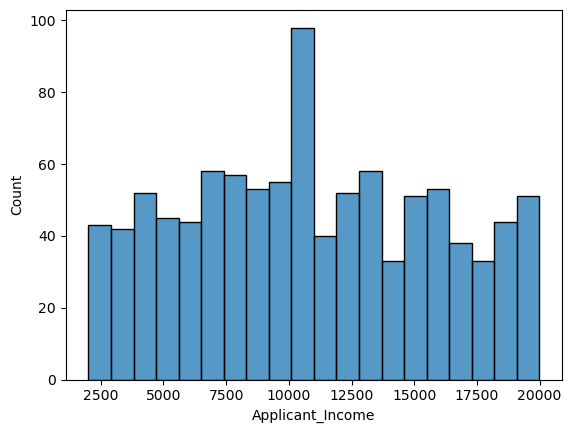

In [42]:
# analyze income

sns.histplot(
    data = df,
    x = "Applicant_Income",
    bins=20
)

In [ ]:
sns.histplot(
    data = df,
    x = "Coapplicant_Income",
    bins = 20
)